In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sloan-digital-sky-survey-dr16/Skyserver_12_30_2019 4_49_58 PM.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()

import plotly.graph_objs as go
py.init_notebook_mode(connected = True)

import plotly.tools as tls

%matplotlib inline

# Importing Libraries

In [3]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Loading Data

In [4]:
##reading data with pandas

df_train = pd.read_csv('../input/sloan-digital-sky-survey-dr16/Skyserver_12_30_2019 4_49_58 PM.csv')


## Taking a peak at the data
df_train.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


# EDA

In [5]:
df_train.shape

(100000, 18)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      100000 non-null  int64  
 1   ra         100000 non-null  float64
 2   dec        100000 non-null  float64
 3   u          100000 non-null  float64
 4   g          100000 non-null  float64
 5   r          100000 non-null  float64
 6   i          100000 non-null  float64
 7   z          100000 non-null  float64
 8   run        100000 non-null  int64  
 9   rerun      100000 non-null  int64  
 10  camcol     100000 non-null  int64  
 11  field      100000 non-null  int64  
 12  specobjid  100000 non-null  uint64 
 13  class      100000 non-null  object 
 14  redshift   100000 non-null  float64
 15  plate      100000 non-null  int64  
 16  mjd        100000 non-null  int64  
 17  fiberid    100000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 13.7+

In [7]:
df_train.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237663e+18,177.512888,25.052056,18.637915,17.407128,16.881676,16.625534,16.467087,3978.727640,301.0,3.274010,187.243080,2.913905e+18,0.170621,2587.984270,53913.908690,341.699080
std,7.264931e+12,78.039070,20.567259,0.832284,0.985921,1.133337,1.209532,1.281788,1691.498597,0.0,1.621208,141.037298,2.488872e+18,0.437571,2210.547391,1547.244489,217.068614
min,1.237646e+18,0.013061,-19.495456,10.611810,9.668339,9.005167,8.848403,8.947795,109.000000,301.0,1.000000,11.000000,2.994897e+17,-0.004136,266.000000,51608.000000,1.000000
25%,1.237658e+18,136.356526,6.770380,18.212902,16.852982,16.196608,15.865275,15.619960,2826.000000,301.0,2.000000,85.000000,1.335426e+18,0.000001,1186.000000,52733.000000,160.000000
50%,1.237662e+18,180.411688,23.918611,18.873250,17.515860,16.890640,16.599885,16.428385,3900.000000,301.0,3.000000,153.000000,2.354330e+18,0.045997,2091.000000,53726.000000,328.000000
75%,1.237667e+18,224.369107,40.344539,19.273302,18.056060,17.585750,17.344912,17.234625,5061.000000,301.0,5.000000,249.000000,3.276384e+18,0.095429,2910.000000,54585.000000,502.000000
max,1.237681e+18,359.999615,84.490494,19.599950,19.996050,31.990100,32.141470,29.383740,8162.000000,301.0,6.000000,982.000000,1.317645e+19,7.011245,11703.000000,58543.000000,1000.000000


In [8]:
df_train['class'].value_counts()

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

# Dropping features we will not need

In [9]:
df_train.drop(['run', 'rerun', 'camcol', 'field', 'objid', 'specobjid', 
              'fiberid'], axis = 1, inplace = True)

df_train.head(3)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115,7255,56597
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093,8290,57364
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165,2861,54583


In [10]:
df_train.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
mjd         0
dtype: int64

# Visualizing The Data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='class', ylabel='count'>

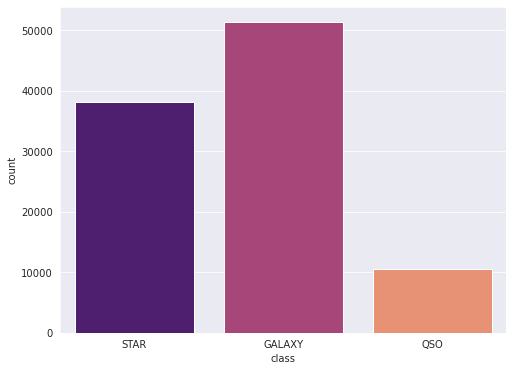

In [11]:
sns.set_style('darkgrid')

plt.figure(figsize = (8,6))

sns.countplot(df_train['class'], palette = 'magma')

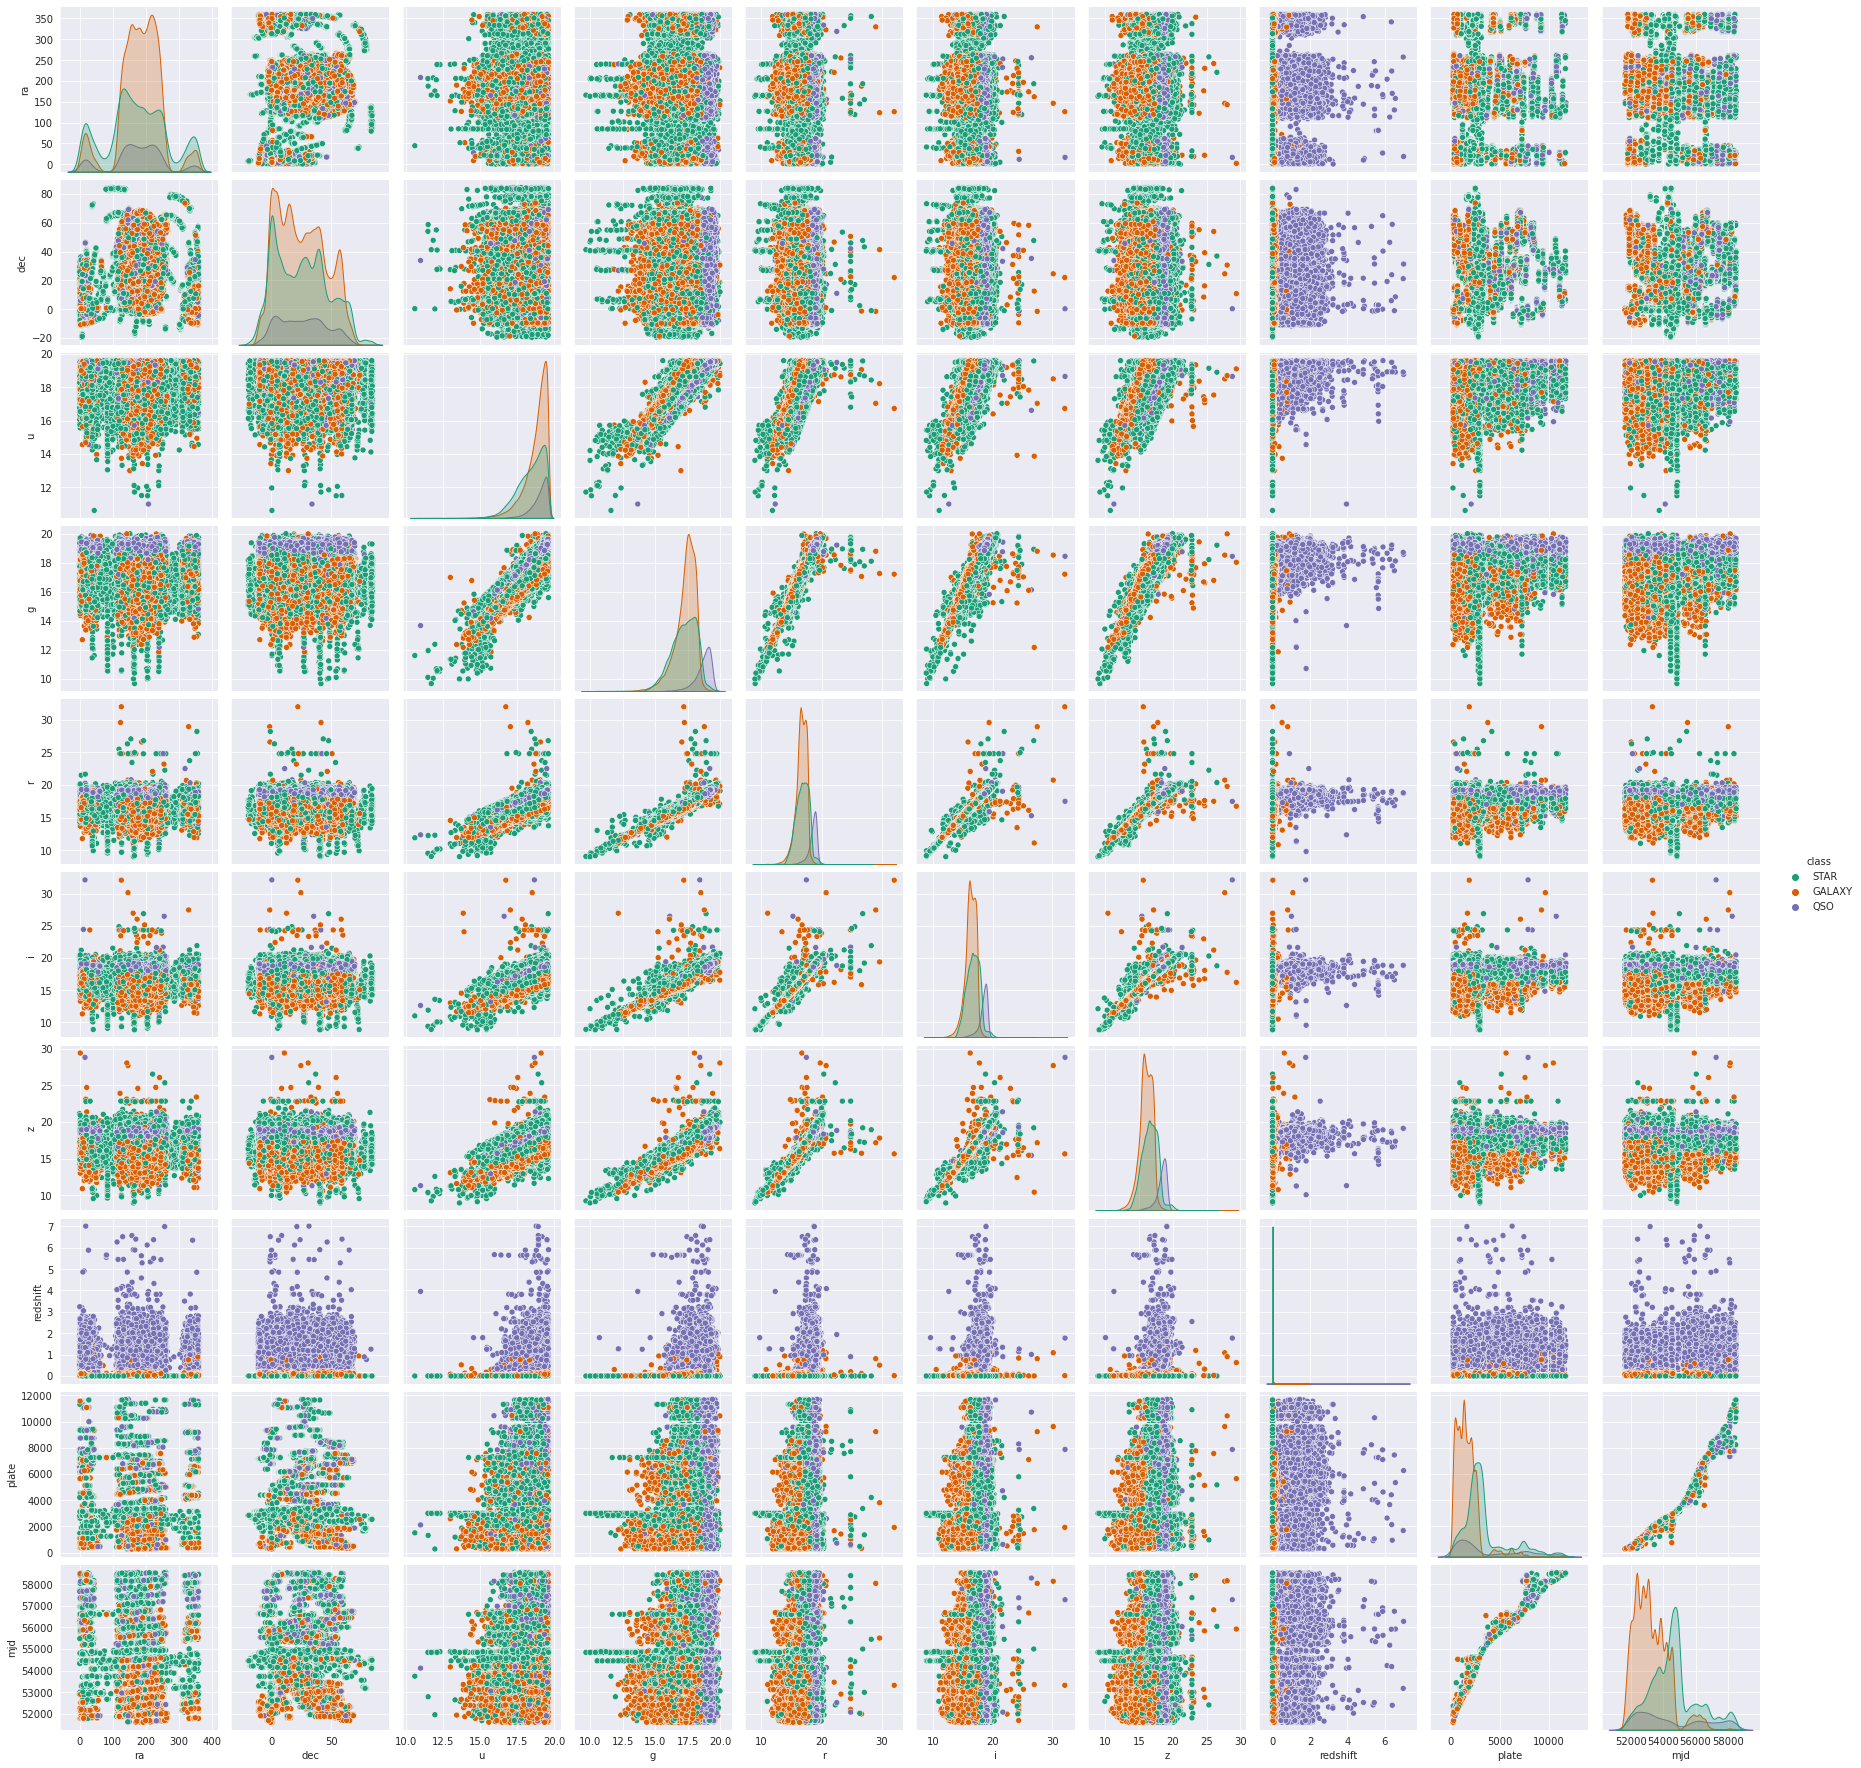

In [12]:
sns.pairplot(data = df_train, palette = 'Dark2', hue = 'class')

<AxesSubplot:xlabel='class', ylabel='mjd'>

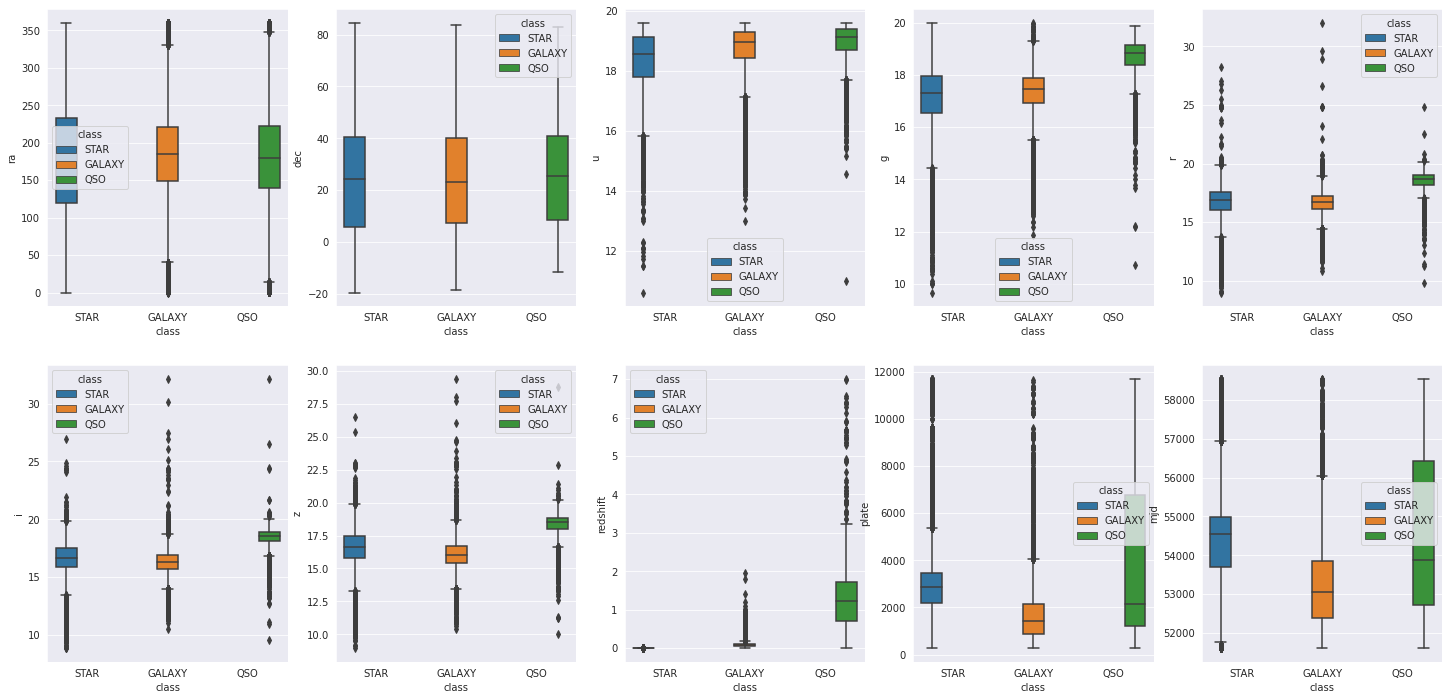

In [13]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows = 2, ncols = 5,
                                                                      figsize = (25,12))


sns.boxplot(ax = ax1, x = 'class', y = 'ra', hue = 'class', data = df_train)
sns.boxplot(ax = ax2, x = 'class', y = 'dec', hue = 'class', data = df_train)
sns.boxplot(ax = ax3, x = 'class', y = 'u', hue = 'class', data = df_train)
sns.boxplot(ax = ax4, x = 'class', y = 'g', hue = 'class', data = df_train)
sns.boxplot(ax = ax5, x = 'class', y = 'r', hue = 'class', data = df_train)
sns.boxplot(ax = ax6, x = 'class', y = 'i', hue = 'class', data = df_train)
sns.boxplot(ax = ax7, x = 'class', y = 'z', hue = 'class', data = df_train)
sns.boxplot(ax = ax8, x = 'class', y = 'redshift', hue = 'class', data = df_train)
sns.boxplot(ax = ax9, x = 'class', y = 'plate', hue = 'class', data = df_train)
sns.boxplot(ax = ax10, x = 'class', y = 'mjd', hue = 'class', data = df_train)

In [14]:
df_train.var()

ra          6.090096e+03
dec         4.230121e+02
u           6.926959e-01
g           9.720404e-01
r           1.284453e+00
i           1.462968e+00
z           1.642981e+00
redshift    1.914680e-01
plate       4.886520e+06
mjd         2.393966e+06
dtype: float64

<AxesSubplot:>

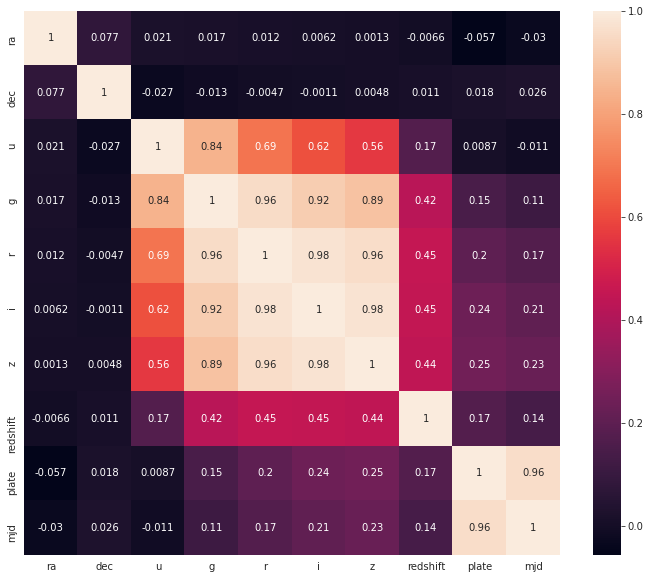

In [15]:
corr = df_train.corr()

plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True)

# Feature Engineering

In [16]:
labels = {'STAR' :1, 'GALAXY': 2, 'QSO': 3}

df_train.replace({'class':labels}, inplace = True)


In [17]:
df_train.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,1,0.000115,7255,56597
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,1,-0.000093,8290,57364
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,1,0.000165,2861,54583
3,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,2,0.058155,2002,53471
4,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,2,0.072210,2123,53793


In [18]:
X = df_train.drop('class', axis = 1).values
y = df_train['class'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [20]:
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

# Logistic Regression

In [21]:
lr = LogisticRegression(max_iter = 120)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Classification Report: \n", classification_report(y_test, y_pred))

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Classification Report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99     11463
           2       0.99      0.98      0.98     15366
           3       0.98      0.93      0.96      3171

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.98     30000
weighted avg       0.98      0.98      0.98     30000

Confusion Matrix: 
 [[11460     0     3]
 [  251 15067    48]
 [    5   203  2963]]
Training Score:  0.9839428571428571
Testing Score:  0.983


#  Support Vector Class.

In [22]:
svc = SVC()
svc.fit(X_train, y_train)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

svc_train_acc = svc.score(X_train, y_train)
print('Training Score: ', svc_train_acc)

svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)


Classification Report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99     11463
           2       0.99      0.98      0.98     15366
           3       0.98      0.93      0.96      3171

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.98     30000
weighted avg       0.98      0.98      0.98     30000

Confusion Matrix: 
 [[11460     0     3]
 [  251 15067    48]
 [    5   203  2963]]
Training Score:  0.9834142857142857
Testing Score:  0.9821666666666666


# Decision Tree Class.